<h1><center>Twitter Mining</center></h1>

## Theoretischer Hintergrund

Social Media Mining beschreibt den Prozess Rohdaten aus Social Media Plattformen zu extrahieren, sie bezüglich Muster zu analysieren und die daraus gewonnenen Erkenntnisse zu präsentieren. Im Social Media Mining werden Konzepte und Methoden aus der Informatik, dem Data Mining, Machine Learning und der Statistik angewendet. Social Media Mining bringt aber auch neue Konzepte und Algorithmen mit sich mit denen es möglich ist massive Rohdaten aus den Social Media Anwendungen zu untersuchen. Dadurch kann herausgefunden werden, wie Individuen (social atoms) interagieren und wie sich Communities (social molecules) bilden. Social Media Mining basiert daher auf Konzepten und Methodologien aus Soziale Netzwerkanalyse (social network analysis), Network Science, Soziologie, Ethnography, Optimierung und Mathematik. Die Wichtigsten unter ihnen sind die Netzwerk- und Graphentheorie. In diesen Theorien kann jedes Individuum durch einen Knoten (node) repräsentiert werden und die Beziehungen der Individuen untereinander durch eine Kante (edge). Im Social Media Mining wird das Interessengraph (interest graph) genannt. Mit Hilfe von Interessengraphen können Korrelationen zwischen Objekten gemessen werden, um beispielsweise Empfehlungen zu machen. Empfehlungen darüber, wem man auf Twitter folgen sollte, was man online kaufen sollte oder wen man kennenlernen sollte.

## Praktischer Hintergrund

### Twitter Terminologie

<b>Tweets</b> sind Status-Aktualisierungen, die maximal 140 Zeichen umfassen. Jedoch werden zusätzlich zum Textinhalt weitere wichtige Informationen mitgesendet.<br> 
<b>Entities</b> sind Teil eines jeden Tweets und stellen wichtige Metadaten zur Verfügung. Entities beinhalten Informationen über URL's, Medien, Hashtags und Nutzererwähnungen.<br> 
<b>Places</b> ist ein weiteres Objekt, das Metadaten liefert. Places sind Orte mit dem Ortsnamen und den dazugehörigen Koordinaten. Places kann der Ort sein an dem das Tweet gesendet wurde oder nur der Ort, der im Tweet genannt wird.<br> 

### Twitter API

Twitter hat eine sehr elegante und einfach zu nutzende API. Jedoch werden wir ein Python-Package namens <b>twitter</b> benutzen, das für uns die Arbeit als Analysten stark vereinfacht. Zur Installation des Paketes können wir einfach <b>pip install twitter</b> im Terminal eingeben. Bevor wir jedoch Anfragen an die Twitter API stellen können müssen wir eine Twitter Applikation erstellen.

### Twitter App erstellen

Auf der Entwicklerseite im Bereich [My Apps](https://dev.twitter.com/apps) können wir eine Twitter Applikation erstellen. Dazu benötigen wir selbstverständlich ein Twitter Account. Die Applikation ist der einzige Weg für Entwickler um Zugang zur Twitter API zu erhalten. Twitter hat somit die Möglichkeit andere Plattformentwickler zu überwachen und gegebenenfalls mit ihnen interagieren.

Diese Vorgehensweise der Autorisierung ist durch das Protokoll <b>OAuth</b> (Open Authorization) standardisiert und wird von den meisten Social Media Plattformen benutzt. Dadurch können die Benutzer den Anwendungen von Drittanbietern Zugang zu ihren Accountdaten erlauben, ohne ihre Zugangsdaten preiszugeben.

<img src="create_twitter_app.png" height="640" width="640">

Nach der Erstellung der App sind die einzigen Informationen, die wir benötigen, um unsere App zu autorisieren Anfragen an die Twitter API zu stellen: 
* <b>consumer key</b>, 
* <b>consumer secret</b>, 
* <b>access token</b> und 
* <b>access token secret.</b><br>

> <b>Wichtiger Hinweis:</b> Diese Keys und Secrets sind sehr wichtige Informationen. Behandle sie also mit der gleichen Empfindlichkeit, wie du deine regulären Zugangsdaten behandelst.

An diese sensiblen Informationen gelangen wir über das Register <b>Keys and Access Tokens</b>.  

>Die Einstellung der Zugangsstufe (Access level) kann auch später nach der Erstellung angepasst werden. Voreingestellt ist read and write, für uns würde auch die Stufe read-only ausreichen (hier entsprechend eigener Interessen einstellen).

<img src="ds_app_details.png" width="640" height="640">

### Analysieren der Trends

Nach dem wir unsere Keys und Secrets erzeugt haben können wir nun eine autorisierte Verbindung zur Twitter API aufbauen.

In [1]:
# Importiere das Twitter-Package
import twitter

In [ ]:
# Inline Hilfe für das Twitter-Package
twitter?
# Inline Hilfe für die Twitter-Klasse
twitter.Twitter?

In [2]:
# Nach dem du die Twitter-App erzeugt hast, setze die Keys und Secrets in die entsprechenden Variablen ein
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

# Erzeuge ein Authentifizierungsobjekt mit deinen Zugangsdaten
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

# Erzeuge ein API-Objekt mit Hilfe des Authentifizierungsobjektes
twitter_api = twitter.Twitter(auth=auth)

# Zeigt lediglich Informationen über das API-Objekt an
print (twitter_api)

Nun können wir die 50 wichtigsten Themen in verschiedenen Ländern oder weltweit herausfinden. Wir benötigen jedoch eine WOEID, den wir als Parameter an unsere Methode übergeben. Das Where On Earth (WOE) ID System ist eine API von Yahoo und ordnet allen Orten auf der Welt, die benannt sind eine einzigartige ID zu. Mit dieser ID können wir die Lokalisation in den Anfragen eingrenzen. Die ID für die wichtigsten globalen Themen ist 1. Für detailliertere Informationen zur WOEID besuche den Bereich [Geoplanet](http://developer.yahoo.com/geo/geoplanet/) auf der Entwicklerseite von Yahoo und für die Anfragemethode die [Twitter API Dokumentation](https://dev.twitter.com/docs/api/1.1/get/trends/place).

In [3]:
# Die globale WOEID
WORLD_WOE_ID = 1
# Die US WOEID 
US_WOE_ID = 23424977

# Gibt die 50 globalen Trending Topics zurück 
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
# Gibt die 50 US Trending Topics zurück
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

# Zeige jeweils ein Topic an
print (world_trends[0]['trends'][0])
print (us_trends[0]['trends'][0])

{'name': '#GERCHI', 'url': 'http://twitter.com/search?q=%23GERCHI', 'promoted_content': None, 'query': '%23GERCHI', 'tweet_volume': 31204}
{'name': '#HealthcareBill', 'url': 'http://twitter.com/search?q=%23HealthcareBill', 'promoted_content': None, 'query': '%23HealthcareBill', 'tweet_volume': 106544}


Die Methode <code>twitter_api.trends.place(_id=WORLD_WOE_ID)</code> führt eine HTTP-Anfrage mit der GET-Methode an die URL https://api.twitter.com/1.1/trends/place.json?id=1 durch. Das Twitter Paket ermöglicht andere Anfragen an die API. Dazu musst du nur deine Anfragen in dem gleichen Schema aufbauen.
<br>
<br>
<br>
Für eine strukturierte Ausgabe, um damit uns das Lesen zu erleichtern benutzen wir das built-in Package <b>json</b>. 

In [4]:
import json

In [5]:
print(json.dumps(world_trends[0]['trends'][0], indent=1))
print(json.dumps(us_trends[0]['trends'][0], indent=1))

{
 "name": "#GERCHI",
 "url": "http://twitter.com/search?q=%23GERCHI",
 "promoted_content": null,
 "query": "%23GERCHI",
 "tweet_volume": 31204
}
{
 "name": "#HealthcareBill",
 "url": "http://twitter.com/search?q=%23HealthcareBill",
 "promoted_content": null,
 "query": "%23HealthcareBill",
 "tweet_volume": 106544
}


In [6]:
# Extrahiere die Trend-Namen aus den globalen Trending-Topics
world_trends_set = set(trend['name']
                       for trend in world_trends[0]['trends'])

# Extrahiere die Trend-Namen aus den Trending-Topics aus den USA
us_trends_set = set(trend['name']
                       for trend in us_trends[0]['trends'])

# Gibt die Elemente (als ein Set) zurück, die in beiden Sets enthalten sind
common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'Ron Howard', 'Andy Reid', '#ShowKindnessBy', '#GERCHI', '#HealthcareBill', '#MyPetsTwitter', '#PutYourPhoneDownAnd', 'Steam', '#RIPRobin'}


List comprehension stellen eine andere, kürzere Form der Listenerzeugung bereit. Falls du damit Schwierigkeiten hast schaue dir die Kapitel 'List Compehensions' und 'Nested List Comprehensions' in der [Python Dokumentation](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions) dazu an, denn wir werden das im Folgenden oft benötigen. 

In [7]:
query = 'Ron Howard'
count = 100# Anzahl der Tweets, die pro Anfrage zurückgegeben werden soll

# Gibt alle relevanten Tweets zu dem jeweiligen Suchwort zurück
search_results = twitter_api.search.tweets(q=query, count=count)
# Speichert die Tweets (search_metadata werden weggelassen) 
statuses = search_results['statuses']

# Stellt weitere 5 Anfragen
for _ in range(5):
    print ("Length of statuses", len(statuses))
    try:
        # Speichert das Feld next_results, das Informationen zu nachfolgenden Resultaten enthält
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e:
        break
    
    # Splittet die Parameter und die jeweiligen Werte und erzeugt ein Dictionary    
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    # Übergibt das erzeugte Dictionary als Parameter
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

Length of statuses 100
Length of statuses 200
Length of statuses 200


Mit der Python Magic Variable kwargs ist es möglich, Schlüssel-Wert-Paare als Parameter an eine Funktion zu übergeben. Für eine ausführliche Erklärung mit Codebeispielen besuche die Webseite [Python Tips](http://book.pythontips.com/en/latest/args_and_kwargs.html). 

In [8]:
# Zeige ein Tweet an
print(json.dumps(statuses[0], indent=1))

{
 "created_at": "Thu Jun 22 20:40:23 +0000 2017",
 "id": 877989666787557376,
 "id_str": "877989666787557376",
 "text": "Thank you Ron Howard, been a HUGE fan since Back draft (&amp; happy days !) https://t.co/zlFuK63gFO",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [],
  "urls": [
   {
    "url": "https://t.co/zlFuK63gFO",
    "expanded_url": "https://twitter.com/TwitterMoments/status/877904160867442688",
    "display_url": "twitter.com/TwitterMoments\u2026",
    "indices": [
     76,
     99
    ]
   }
  ]
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status_id_str": null,
 "in_reply_to_user_id": null,
 "in_reply_to_user_id_str": null,
 "in_reply_to_screen_name": null,
 "user": {
  "id": 24754791,
  "id_str": "24754791",
  "name": "#DemExit #NoDAPL",
  "screen_

In [9]:
# Einen einzelnen Tweet extrahieren
t = statuses[0]

In [10]:
# Gibt die Schlüssel aus, d.h. die höchsten Felder
t.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [11]:
# Gibt die ID aus
t['id']

877989666787557376

In [12]:
# Gibt den Textinhalt aus
t['text']

'Thank you Ron Howard, been a HUGE fan since Back draft (&amp; happy days !) https://t.co/zlFuK63gFO'

In [13]:
# Gibt die Entities aus
t['entities']

{'hashtags': [],
 'symbols': [],
 'urls': [{'display_url': 'twitter.com/TwitterMoments…',
   'expanded_url': 'https://twitter.com/TwitterMoments/status/877904160867442688',
   'indices': [76, 99],
   'url': 'https://t.co/zlFuK63gFO'}],
 'user_mentions': []}

In [14]:
# Gibt die Anzahl der Likes aus
t['favorite_count']

0

In [15]:
# Gibt die Anzahl der Retweets aus
t['retweet_count']

0

In [16]:
# Ist dieses Feld vorhanden, ist das ein Retweet
# Es beinhaltet detaillierte Informationen über das Original Tweet und über dessen Autor
t['retweeted_status']

KeyError: 'retweeted_status'

In [17]:
# Gibt an, ob dieser Tweet von dir retweetet wurde
t['retweeted']

False

### Analysieren der Tweet Entities

In [18]:
# Extrahiere die Textinhalte aus den Tweets
status_texts = [ status['text'] 
                 for status in statuses ]

# Extrahiere die Anzeigenamen
screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

# Extrahiere die Hashtags
hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Erstelle eine Kollektion mit allen Wörtern, die in den Tweets vorkommen
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Die ersten 5 Ausgaben für alle
print (json.dumps(status_texts[0:5], indent=1))
print (json.dumps(screen_names[0:5], indent=1)) 
print (json.dumps(hashtags[0:5], indent=1))
print (json.dumps(words[0:5], indent=1))

[
 "Thank you Ron Howard, been a HUGE fan since Back draft (&amp; happy days !) https://t.co/zlFuK63gFO",
 "RT @JoshKurp: Disney, to Ron Howard: \"Here's some money. Go direct a Star War.\" https://t.co/gDHYFdm5GR",
 "RT @Densho: Fans de SW en 2012: No mamen, c\u00f3mo Disney, ya vali\u00f3 verga todo!\n\nFans de SW en 2017: No mamen, c\u00f3mo Ron Howard, ya vali\u00f3 verga\u2026",
 "@willandrades ron howard fez rush uma mente brilhante a luta pela esperan\u00e7a. maus filmes?",
 "RT @mrtoldo: \u00bfY no sirve si Lord &amp; Miller acaban la pel\u00edcula PERO le ponen una voz en off con Ron Howard explicando lo que quer\u00eda Lucasfilm?"
]
[
 "JoshKurp",
 "Densho",
 "willandrades",
 "mrtoldo",
 "TIME"
]
[
 "entertainment",
 "News",
 "ChicagoFire",
 "tendenze",
 "StarWars"
]
[
 "Thank",
 "you",
 "Ron",
 "Howard,",
 "been"
]


Mit dem Counter aus dem Collections Package wird das Zählen von Wörtern, die in den Entitäten vorkommen stark vereinfacht. Der Counter erzeugt dabei eine Liste mit Schlüssel-Wert-Paaren.

In [19]:
from collections import Counter

# Zähle alle Wörter (Tokens) die in den Listen words, screen_names und hashtags drinvorkommen 
for item in [words, screen_names, hashtags]:
    c = Counter(item)# Erzeuge ein Counter für die entsprechende Liste
    print (c.most_common()[:10])# Zeige die Top Ten aus den drei Listen an

[('Ron', 182), ('Howard', 158), ('RT', 132), ('the', 124), ('Han', 119), ('Solo', 95), ('to', 51), ('will', 41), ('on', 41), ('a', 33)]
[('starwars', 29), ('ifiwere2tweet', 5), ('THR', 5), ('Breznican', 4), ('BuzzFeed', 4), ('BadFatherHan', 3), ('SamuelAAdams', 3), ('TimGrierson', 3), ('PopVoxCulture', 3), ('JoshKurp', 2)]
[('StarWars', 10), ('RonHoward', 8), ('HanSoloMovie', 5), ('HanSolo', 5), ('starwars', 4), ('HealthcareBill', 2), ('PutYourPhoneDownAnd', 2), ('Hansolo', 2), ('Entertainment', 2), ('Buzz', 2)]


Mittels Pretty Table können wir uns das Ergebnis geordnet ausgeben lassen. Falls Pretty Table noch nicht installiert ist kannst du das mit der Eingabe von <b>pip install prettytable</b> in der Konsole nachholen.

In [20]:
from prettytable import PrettyTable

# Erzeuge für alle drei Listen eine Tabelle mit PrettyTable
for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])# Erzeuge die Tabelle mit den jeweiligen Spalten
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]# Fügt das Schlüssel-Wert-Paar in die Zeile ein
    pt.align[label], pt.align['Count'] = 'l', 'r'# Legt die Ausrichtung der Werte in der Tabelle fest
    print (pt)

+--------+-------+
| Word   | Count |
+--------+-------+
| Ron    |   182 |
| Howard |   158 |
| RT     |   132 |
| the    |   124 |
| Han    |   119 |
| Solo   |    95 |
| to     |    51 |
| will   |    41 |
| on     |    41 |
| a      |    33 |
+--------+-------+
+---------------+-------+
| Screen Name   | Count |
+---------------+-------+
| starwars      |    29 |
| ifiwere2tweet |     5 |
| THR           |     5 |
| Breznican     |     4 |
| BuzzFeed      |     4 |
| BadFatherHan  |     3 |
| SamuelAAdams  |     3 |
| TimGrierson   |     3 |
| PopVoxCulture |     3 |
| JoshKurp      |     2 |
+---------------+-------+
+---------------------+-------+
| Hashtag             | Count |
+---------------------+-------+
| StarWars            |    10 |
| RonHoward           |     8 |
| HanSoloMovie        |     5 |
| HanSolo             |     5 |
| starwars            |     4 |
| HealthcareBill      |     2 |
| PutYourPhoneDownAnd |     2 |
| Hansolo             |     2 |
| Entertainment   

In [21]:
# Berechne die Vielfalt
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# Berechne die Durchschnittliche Anzahl der Wörter in einem Tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ])# Die Summe der Anzahl aller Wörter 
    return 1.0*total_words/len(statuses)

print (lexical_diversity(words)) # Wortvielfalt
print (lexical_diversity(screen_names)) # Namensvielfalt
print (lexical_diversity(hashtags)) # Hashtagvielfalt
print (average_words(status_texts)) # durchschnittliche Häufigkeit der Wörter

0.3279164248403947
0.5771812080536913
0.5769230769230769
17.23


Die Ergebnisse können wie folgt interpretiert werden:
* In der Liste der Wörter sind 1 von 3 Wörtern einzigartig
* In der Liste der Anzeigenamen sind 6 von 10 Namen, die in den Tweets erwähnt werden, einzigartig
* In der Liste der Hashtags sind nur 4 von 10 Hashtags 'Ron Howard'
* Die durchschnittliche Häufigkeit der Wörter in einem Tweet beträgt 17

In [22]:
# Erzeuge eine Liste mit dreier Tupeln aus den Tweets die Retweetet wurden
retweets = [
    
            (status['retweet_count'], # Anzahl der Retweets
             status['retweeted_status']['user']['screen_name'], #Anzeigename
             status['text']) # Textinhalt
            
            for status in statuses 
            
                if 'retweeted_status' in status
           ]

# Erstelle eine Tabelle aus der Liste
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print (pt)

+-------+-------------+----------------------------------------------------+
| Count | Screen Name | Text                                               |
+-------+-------------+----------------------------------------------------+
| 4646  | starwars    | RT @starwars: Academy Award-winning filmmaker Ron  |
|       |             | Howard will assume directorial duties on the       |
|       |             | untitled Han Solo film. https://t.co/Ki04TAo…      |
| 4646  | starwars    | RT @starwars: Academy Award-winning filmmaker Ron  |
|       |             | Howard will assume directorial duties on the       |
|       |             | untitled Han Solo film. https://t.co/Ki04TAo…      |
| 4646  | starwars    | RT @starwars: Academy Award-winning filmmaker Ron  |
|       |             | Howard will assume directorial duties on the       |
|       |             | untitled Han Solo film. https://t.co/Ki04TAo…      |
| 4646  | starwars    | RT @starwars: Academy Award-winning filmmaker Ron  |

In [23]:
# Gibt eine Liste der 100 aktuellsten Retweets zurück
_retweets = twitter_api.statuses.retweets(id=875379042492456960)
print ([retweet['user']['screen_name'] for retweet in _retweets])# Die Anzeigenamen der Retweeter werden ausgegeben

['BU_NeonHat', 'ArtziDavid', 'kingrussell56', '_BootyKing', 'KJ_DOOM', 'PantherU', 'yungloudancolin', 'unrealbenlenet', 'godjthatsmydj2', 'CforDanger', 'ZachEClark', 'AzLocoCat', 'JustinESports', 'Gturn15', 'TweetinTom09', 'UselessSGrant', 'edwardjsilva', 'KyleWoTB', 'DJmcLD']


In [24]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

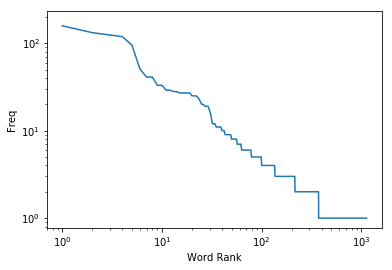

In [25]:
# Sortiert die Häufigkeit der Wörter nach absteigender Reihenfolge
word_counts = sorted(Counter(words).values(), reverse=True)

# Zeichnet das Schaubild mit einer logarithmischen Skalierung
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

In diesem Schaubild werden die Schlüssel-Wert-Paare für die Wörter, die wir weiter oben berechnet haben dargestellt. Die Y-Achse stellt dabei die Häufigkeit der Wörter dar und die X-Achse den Index der Wörter. Jedoch ist die X-Achse in absteigender Reihenfolge sortiert. Für eine bessere Darstellung der kleineren Werte wurde eine logarithmische Skalierung benutzt.  

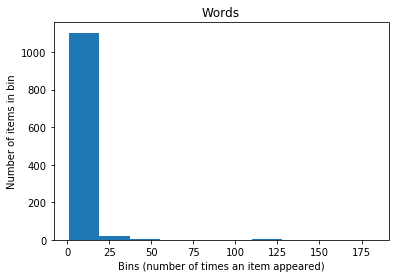

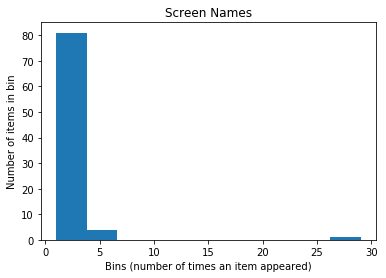

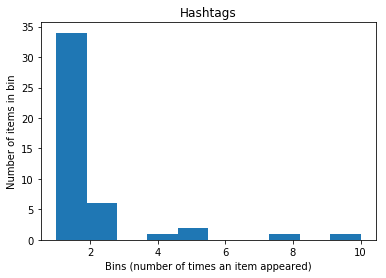

In [26]:
# Erzeuge für jede Liste  ein Histrogramm mit den entsprechenden Häufigkeiten
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    c = Counter(data)
    plt.hist(list(c.values()))
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    plt.figure()

[596, 6, 8, 61, 126, 4646, 421, 2, 24, 1, 171, 606, 95, 22, 510, 596, 606, 1, 421, 5, 151, 31, 8, 42, 295, 46, 45, 72, 1, 1, 15, 1, 34, 45, 4646, 4646, 4646, 684, 2, 4646, 5, 4646, 1, 1, 1, 309, 2, 2, 2, 2, 4, 4646, 4646, 46, 211, 140, 4646, 20, 171, 4646, 421, 684, 4646, 21, 50, 4646, 62, 171, 249, 4646, 19, 4646, 4646, 9, 3, 4646, 231, 3, 42, 4, 28, 4646, 4646, 309, 15, 4646, 3, 295, 510, 104, 4646, 510, 3, 6, 606, 25, 171, 2, 71, 309, 61, 3, 280, 2, 72, 510, 4646, 510, 48, 4646, 4646, 31, 31, 1, 140, 9, 9, 2, 29, 9, 4646, 22, 24, 9, 1, 126, 192, 31, 288, 217, 4646, 1]


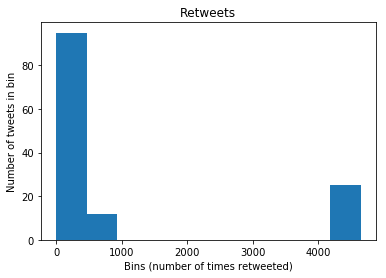

In [27]:
# Erzeuge ein Histogramm mit den Häufigkeiten der Tweets
counts = [count for count, _, _ in retweets] 
# Die Unterstriche bedeuten, dass die zweiten und dritten Elemente im Tupel vernachlässigt werden

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print (counts)

<b>Quellen: </b>
<br>
* Russell, M. A. (2013). Mining the Social Web: Data Mining Facebook, Twitter, LinkedIn, Google+, GitHub, and More. "   O'Reilly Media, Inc.".: http://chimera.labs.oreilly.com/books/1234000001583/ch01.html#social-websites-rage<br>
* Python Dokumentation: https://docs.python.org/2.7/<br>
* Python Tips: http://book.pythontips.com/en/latest/index.html#<br>
* Twitter Developer Dokumentation: https://dev.twitter.com/docs<br>
* Wikipedia: https://www.wikipedia.de/<br>
* Zafarani, R., Abbasi, M. A., & Liu, H. (2014). Social media mining: an introduction. Cambridge University Press. :http://dmml.asu.edu/smm/SMM.pdf<br>